# Import modules

In [1]:
# import modules
import pandas as pd
#import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data

In [2]:
# Initialise a pandas DataFrame from the csv file (tab separated)
df = pd.read_csv('data/wingspan_stats_anon.csv',
    sep = ",",
)
df = df.drop(columns={'Nectar'})
df

,Unnamed: 0,Player,Game ID,Birds,Bonus cards,End-of-round goals,Eggs,Food on cards,Tucked cards,Total,Expansion
0,0,Bonita,1,44,8,14.0,20,0,4.0,90.0,Original
1,1,Landon,1,39,0,13.0,19,0,6.0,77.0,Original
2,2,Marion,1,40,13,14.0,13,1,4.0,85.0,Original
3,3,Robena,2,43,18,15.0,24,2,5.0,107.0,Original
4,4,Dennis,2,40,16,18.0,32,0,5.0,111.0,Original
...,...,...,...,...,...,...,...,...,...,...,...
495,495,Dennis,154,38,7,0.2,30,0,0.0,75.2,Asia
496,496,Robena,154,35,20,0.2,11,8,7.0,81.2,Asia
497,497,Danette,154,38,19,11.0,17,0,1.0,86.0,Asia
498,498,Felton,154,28,6,9.2,33,0,0.0,76.2,Asia


In [3]:
df_oceania = (
    pd
    .read_csv('data/wingspan_stats_anon.csv',sep = ",",)
    .query("Expansion == 'Oceania'")
)

In [4]:
len(df['Game ID'].unique())

152

In [5]:
df_long = pd.melt(df, id_vars='Expansion', value_vars=['Birds', 'Bonus cards', 'End-of-round goals', 'Eggs',
       'Food on cards', 'Tucked cards', 'Total',])

In [6]:
df_long

,Expansion,variable,value
0,Original,Birds,44.0
1,Original,Birds,39.0
2,Original,Birds,40.0
3,Original,Birds,43.0
4,Original,Birds,40.0
...,...,...,...
3495,Asia,Total,75.2
3496,Asia,Total,81.2
3497,Asia,Total,86.0
3498,Asia,Total,76.2


<Axes: xlabel='variable', ylabel='value'>

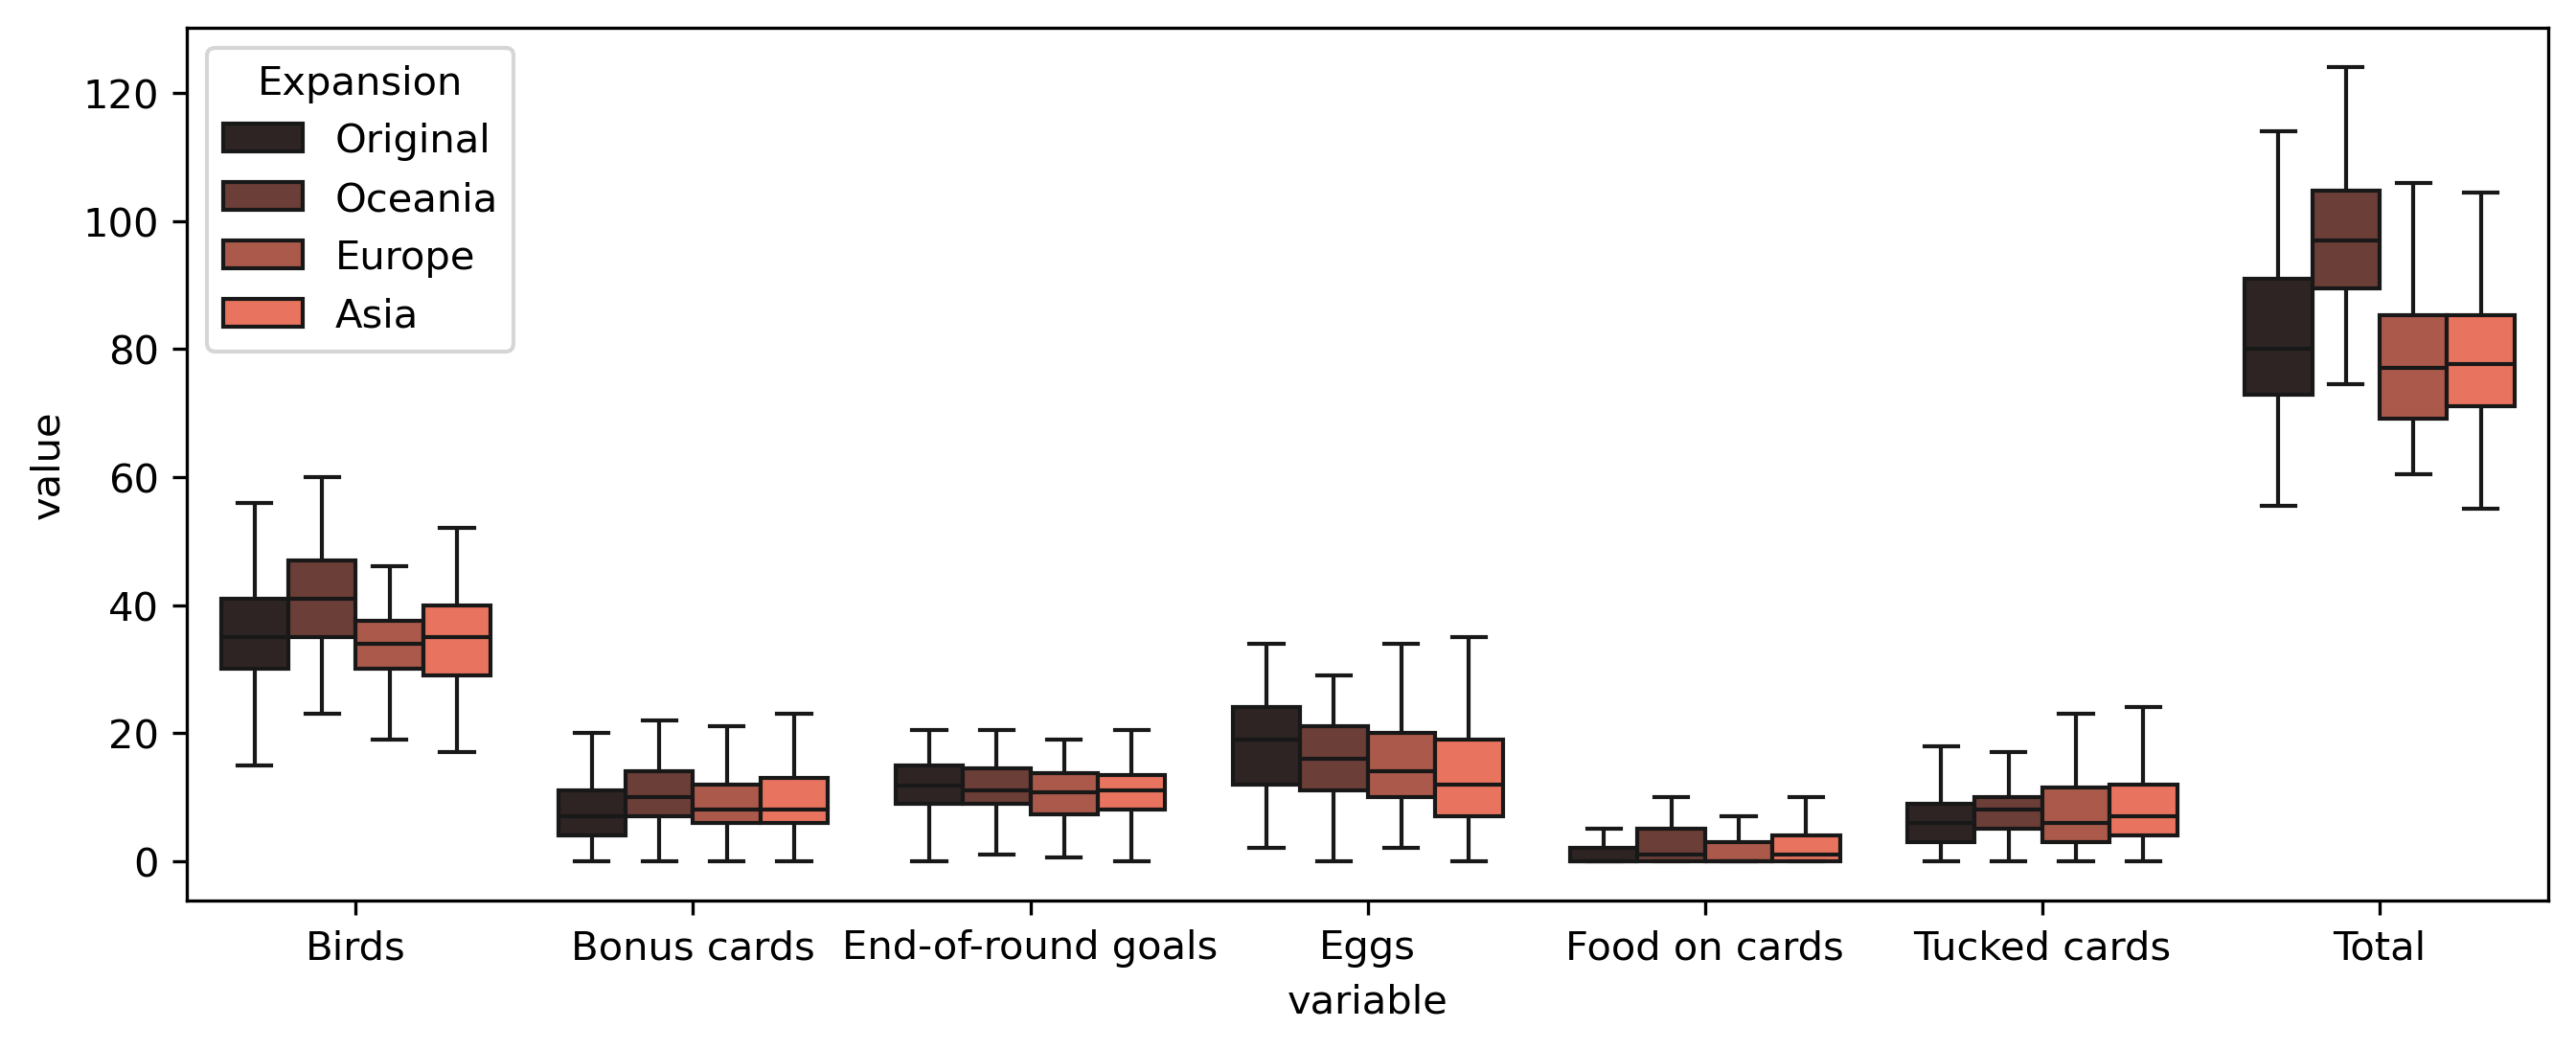

In [7]:
fig, ax = plt.subplots(figsize=(2.5*3.54,3.54), dpi=300,layout="constrained")

sns.boxplot(
    ax=ax,
    x='variable', 
    y='value', 
    data=df_long, 
    showfliers=False, 
    palette='dark:tomato', 
    hue='Expansion',
    #labels = None,
)      

<Axes: xlabel='Player'>

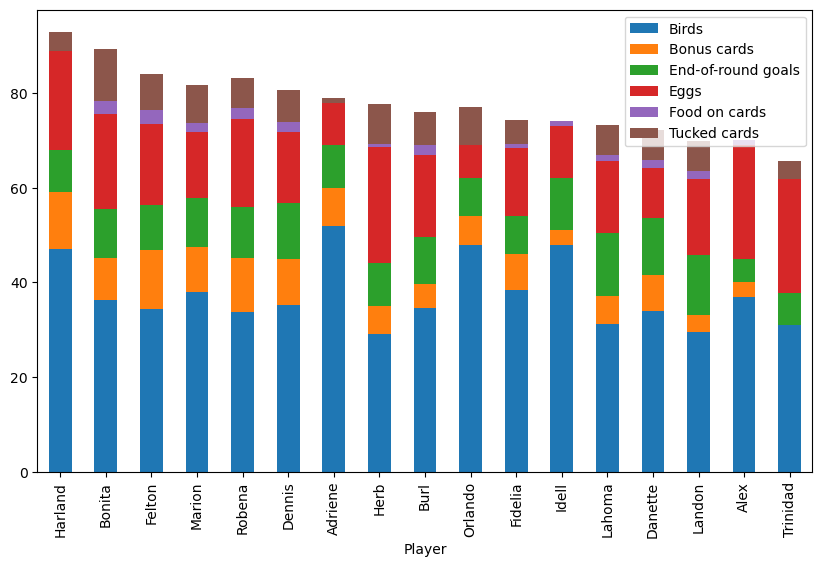

In [8]:
fig, ax = plt.subplots(figsize=(10,6))

(
    df
    .loc[:,['Player','Game ID','Birds','Bonus cards','End-of-round goals', 'Eggs' ,'Food on cards', 'Tucked cards', 'Total']]
    .sort_values('Total')
    .groupby('Player').mean()
    .sort_values('Total',ascending=False)
    .plot.bar(
        y = ['Birds', 'Bonus cards', 'End-of-round goals', 'Eggs', 'Food on cards', 'Tucked cards'
         #,'Nectar'
            ],
    stacked = True,
    ax=ax)
)

<Axes: xlabel='Game ID'>

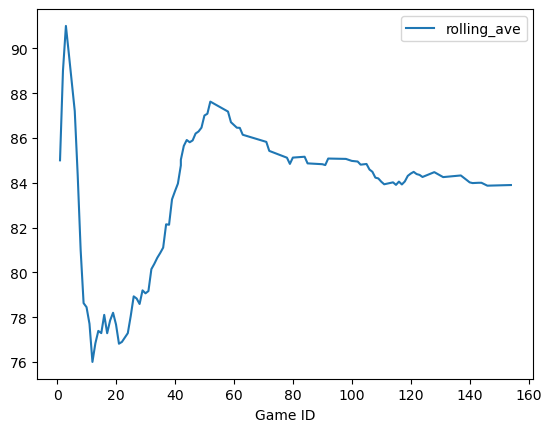

In [9]:
player_of_interest = 'Marion'

(
    df
    .query("Player == @player_of_interest")
    .reset_index(drop=True)
    .sort_values(by='Game ID')
    .assign(rolling_ave = lambda x : x.Total.cumsum()/(x.index+1))
    .plot.line(x = 'Game ID', y = 'rolling_ave')
)

In [10]:
df_scores = pd.DataFrame()

for game in range(len(df['Game ID'])):
    temp = (
        df
        .query("`Game ID` == @game")
        .sort_values(by = 'Total',ascending=False)
        .reset_index(drop=True)
        .assign(nr_players = lambda x : len(x.Player))
        .assign(place = lambda x: (x.index+1))
        .assign(score = lambda x : (len(x.Player) + 1 - 2*x.place)/(len(x.Player) - 1))
    )
    df_scores = pd.concat([df_scores,temp])

In [11]:
df.head(60)

,Unnamed: 0,Player,Game ID,Birds,Bonus cards,End-of-round goals,Eggs,Food on cards,Tucked cards,Total,Expansion
0,0,Bonita,1,44,8,14.0,20,0,4.0,90.0,Original
1,1,Landon,1,39,0,13.0,19,0,6.0,77.0,Original
2,2,Marion,1,40,13,14.0,13,1,4.0,85.0,Original
3,3,Robena,2,43,18,15.0,24,2,5.0,107.0,Original
4,4,Dennis,2,40,16,18.0,32,0,5.0,111.0,Original
5,5,Bonita,2,54,13,15.0,33,0,4.0,119.0,Original
6,6,Marion,2,36,13,17.0,22,4,1.0,93.0,Original
7,7,Danette,2,35,6,15.0,27,3,6.0,92.0,Original
8,8,Lahoma,3,44,9,13.0,15,4,0.0,85.0,Original
9,9,Marion,3,46,16,17.0,13,0,3.0,95.0,Original


<Axes: xlabel='place', ylabel='Count'>

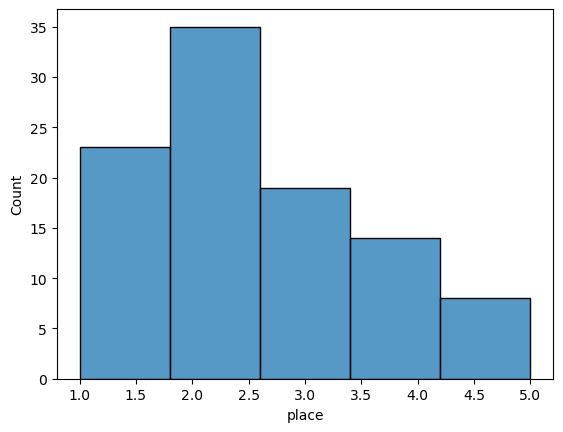

In [12]:
data = (
    df_scores
    .query("Player == 'Marion'")
)

sns.histplot(data.place,bins=5)
#sns.kdeplot(data.score)d


In [13]:
#min_count = 10
#
#fig, axes = plt.subplots(2, 1, figsize=(12, 10))
#
#all_game_ids = df_scores['Game ID'].unique()
#
#for player in df_scores.Player.unique():
#    player_data = df_scores.query("Player == @player")
#    if len(player_data) < min_count:
#        print(player + ' has played too few games')
#    else:
#        # Reindex to ensure all game IDs are present
#        player_data_reindexed = (
#            player_data
#            .reset_index(drop=True)
#            .set_index('Game ID')
#            .reindex(all_game_ids)
#            .assign(score=player_data.score.values)
#            .sort_index()
#            .assign(rolling_ave=lambda x : x.score.rolling(min_count, min_periods=1).mean())
#            .assign(cumul_score=lambda x : x.score.cumsum().div(np.arange(1, len(x) + 1)))
#            .ffill()  # Forward fill to extend scores
#            .bfill()  # Backward fill for initial NaNs
#        )
#
#        # Plot rolling average
#        player_data_reindexed.plot(ax=axes[0], y='rolling_ave', label=player, drawstyle="steps")
#        
#        # Plot cumulative score
#        player_data_reindexed.plot(ax=axes[1], y='cumul_score', label=player, drawstyle="steps")
#
## Draw reference lines
#axes[0].axhline(color='black', linestyle='--', alpha=0.5)
#axes[1].axhline(color='black', linestyle='--', alpha=0.5)
#
#plt.tight_layout()


Landon has played too few games
Fidelia has played too few games
Alex has played too few games
Orlando has played too few games
Idell has played too few games
Harland has played too few games
Adriene has played too few games
Burl has played too few games
Trinidad has played too few games
Landon has played too few games
Fidelia has played too few games
Alex has played too few games
Orlando has played too few games
Idell has played too few games
Harland has played too few games
Adriene has played too few games
Burl has played too few games
Trinidad has played too few games


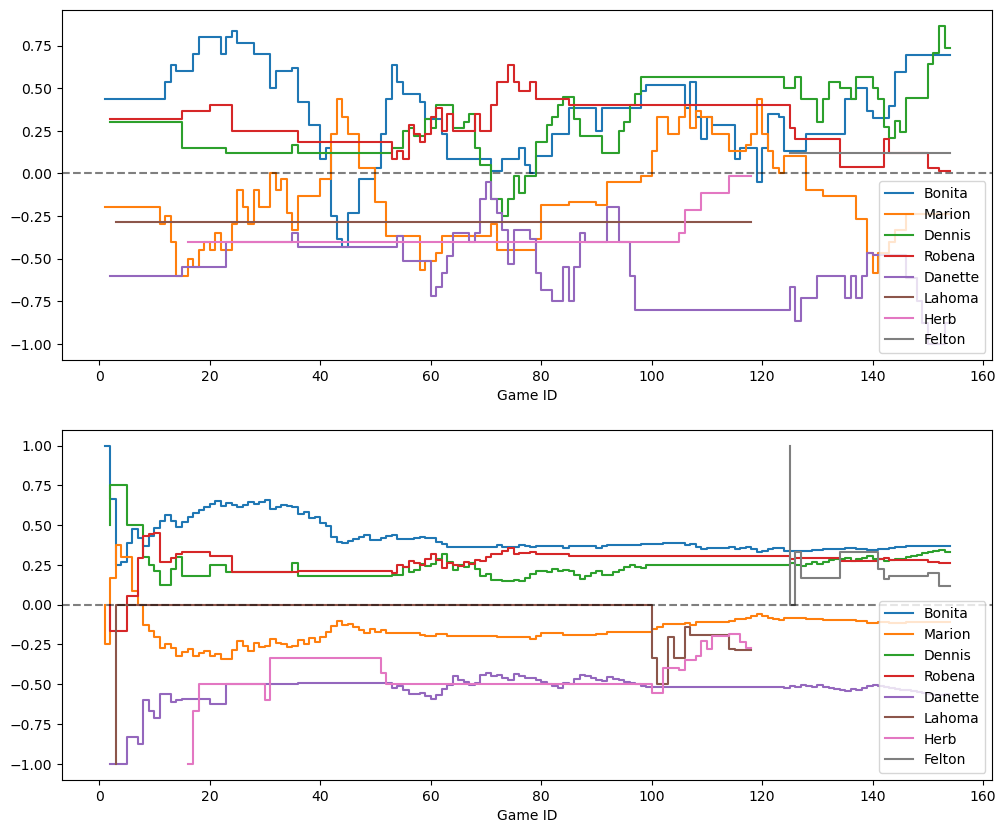

In [14]:
min_count = 10

fig, axes = plt.subplots(2,1,figsize=(12,10))
for player in df_scores.Player.unique():
    if len(df_scores.query("Player == @player")) < min_count:
        print(player + ' has played too few games')
    else:
        (
            df_scores
            .query("Player == @player")
            .reset_index(drop=True)
            .assign(rolling_ave = lambda x : x.score.rolling(min_count).mean())
            .assign(cumul_score = lambda x : x.score.cumsum().div(x.index+1))
            .ffill()
            .bfill()
            #.dropna()
            .plot(ax = axes[0],x ='Game ID', y = 'rolling_ave',label=player, drawstyle="steps")
        )
axes[0].axhline(color='black',linestyle='--',alpha=0.5)

for player in df_scores.Player.unique():
    if len(df_scores.query("Player == @player")) < min_count:
        print(player + ' has played too few games')
    else:
        (
            df_scores
            .query("Player == @player")
            .reset_index(drop=True)
            .assign(rolling_ave = lambda x : x.score.rolling(min_count).mean())
            .assign(cumul_score = lambda x : x.score.cumsum().div(x.index+1))
            .ffill()
            .bfill()
            #.dropna()
            .plot(ax = axes[1], x = 'Game ID', y = 'cumul_score',label=player, drawstyle="steps")
        )        
        
axes[1].axhline(color='black',linestyle='--',alpha=0.5)

In [15]:
df_scores2 = pd.DataFrame()

for player in df_scores.Player.unique():
    if len(df_scores.query("Player == @player")) < min_count:
        print(player + ' has played too few games')
    else:
        temp = (
            df_scores
            .query("Player == @player")
            .reset_index(drop=True)
            .assign(rolling_ave = lambda x : x.score.rolling(min_count).mean())
            .assign(cumul_score = lambda x : x.score.cumsum().div(x.index+1))
            #.dropna()
            #.plot(ax = axes[0], y = 'cumul_score',label=player)
        )
    df_scores2 = pd.concat([df_scores2,temp])

Landon has played too few games
Fidelia has played too few games
Alex has played too few games
Orlando has played too few games
Idell has played too few games
Harland has played too few games
Adriene has played too few games
Burl has played too few games
Trinidad has played too few games


In [16]:
df

,Unnamed: 0,Player,Game ID,Birds,Bonus cards,End-of-round goals,Eggs,Food on cards,Tucked cards,Total,Expansion
0,0,Bonita,1,44,8,14.0,20,0,4.0,90.0,Original
1,1,Landon,1,39,0,13.0,19,0,6.0,77.0,Original
2,2,Marion,1,40,13,14.0,13,1,4.0,85.0,Original
3,3,Robena,2,43,18,15.0,24,2,5.0,107.0,Original
4,4,Dennis,2,40,16,18.0,32,0,5.0,111.0,Original
...,...,...,...,...,...,...,...,...,...,...,...
495,495,Dennis,154,38,7,0.2,30,0,0.0,75.2,Asia
496,496,Robena,154,35,20,0.2,11,8,7.0,81.2,Asia
497,497,Danette,154,38,19,11.0,17,0,1.0,86.0,Asia
498,498,Felton,154,28,6,9.2,33,0,0.0,76.2,Asia


In [17]:
df_scores

,Unnamed: 0,Player,Game ID,Birds,Bonus cards,End-of-round goals,Eggs,Food on cards,Tucked cards,Total,Expansion,nr_players,place,score
0,0,Bonita,1,44,8,14.0,20,0,4.0,90.0,Original,3,1,1.0
1,2,Marion,1,40,13,14.0,13,1,4.0,85.0,Original,3,2,0.0
2,1,Landon,1,39,0,13.0,19,0,6.0,77.0,Original,3,3,-1.0
0,5,Bonita,2,54,13,15.0,33,0,4.0,119.0,Original,5,1,1.0
1,4,Dennis,2,40,16,18.0,32,0,5.0,111.0,Original,5,2,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,494,Marion,154,47,3,2.7,16,7,11.0,86.7,Asia,6,2,0.6
2,497,Danette,154,38,19,11.0,17,0,1.0,86.0,Asia,6,3,0.2
3,496,Robena,154,35,20,0.2,11,8,7.0,81.2,Asia,6,4,-0.2
4,498,Felton,154,28,6,9.2,33,0,0.0,76.2,Asia,6,5,-0.6


Original
Oceania
Europe
Asia


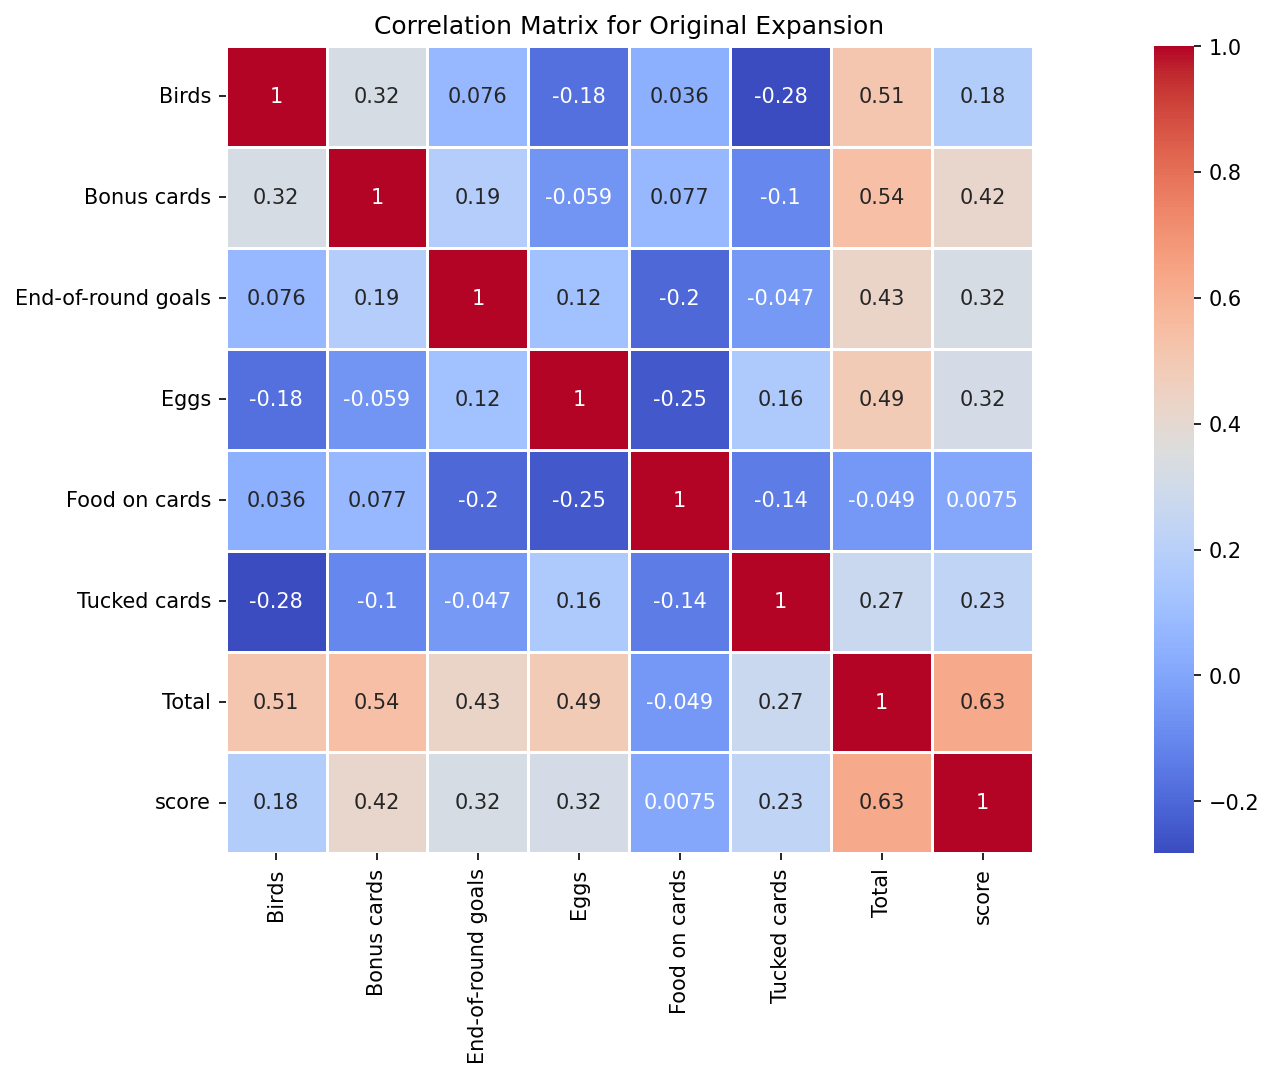

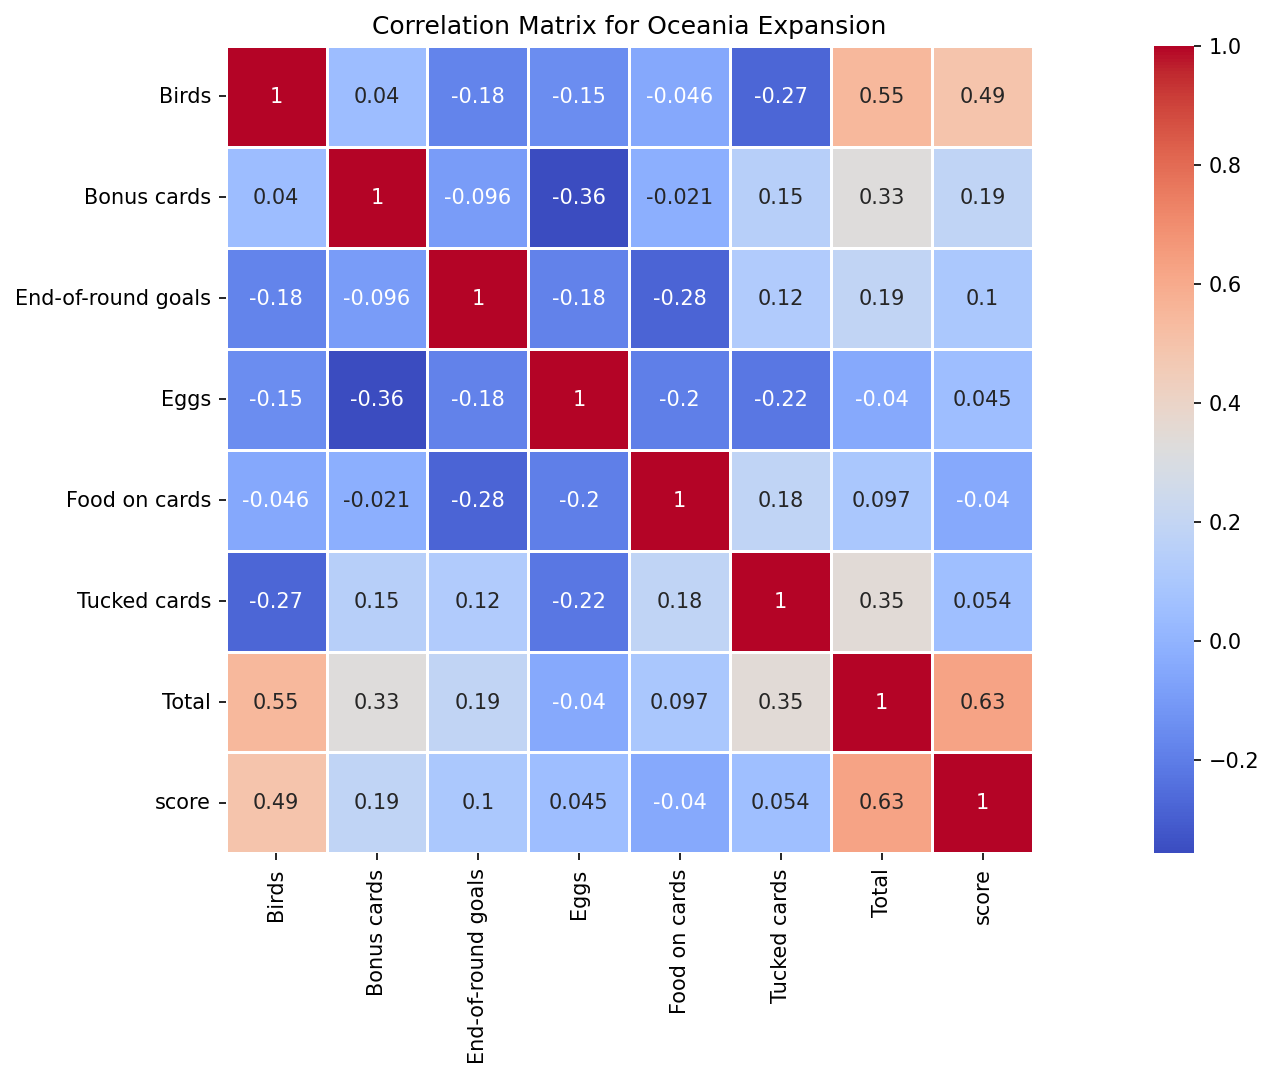

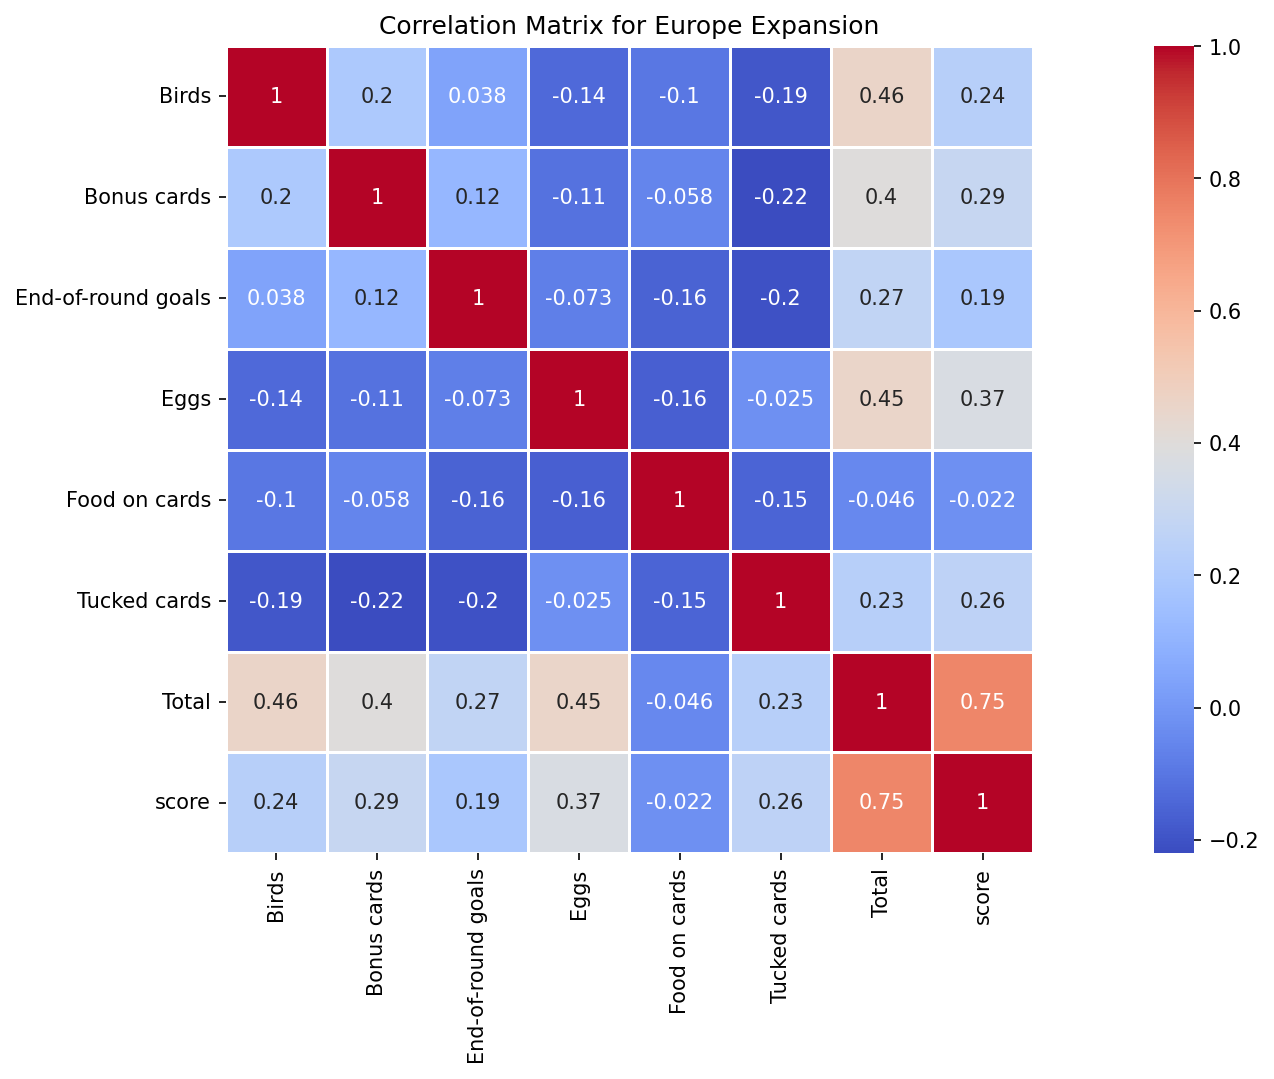

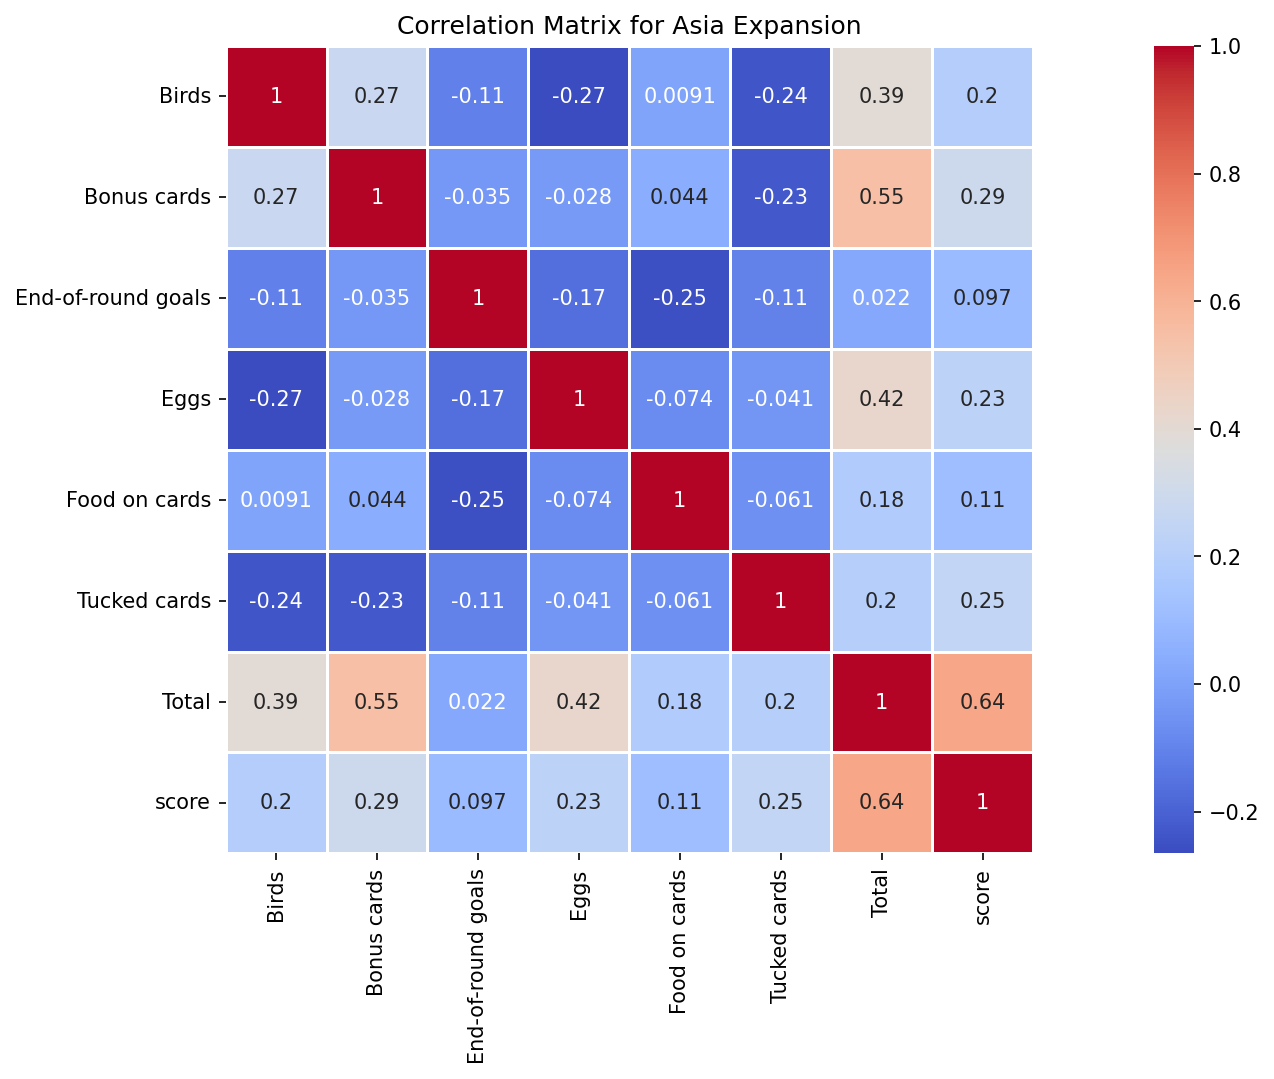

In [20]:
# Iterate over each unique expansion type
for i, expansion in enumerate(df_scores['Expansion'].unique()):
    print(expansion)
    # Filter the dataframe for each expansion type
    df_expansion = df_scores.query("Expansion == @expansion").drop(columns={'Unnamed: 0'})

    # Compute the correlation matrix for the current expansion
    correlation_matrix = df_expansion.drop(columns=['Player', 'Game ID', 'Expansion','nr_players','place']).corr()

    # Plot the heatmap
    plt.figure(dpi=150,figsize=(5*3.54,2*3.54),layout='constrained')
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title(f'Correlation Matrix for {expansion} Expansion')
    plt.savefig(f'figures/corr_mat_{expansion}.pdf',bbox_inches='tight')